In [1]:
import Pkg
Pkg.activate("../.")

"/home/mark/devel/InterpolatedRejectionSampling/Project.toml"

In [2]:
X = range(0, π, length=10)
Y = range(0, π/4, length=9)
knots = (X,Y)
prob = [sin(x)+tan(y) for x in X, y in Y]

10×9 Array{Float64,2}:
 0.0          0.0984914  0.198912  0.303347  …  0.668179  0.820679  1.0    
 0.34202      0.440512   0.540933  0.645367     1.0102    1.1627    1.34202
 0.642788     0.741279   0.8417    0.946134     1.31097   1.46347   1.64279
 0.866025     0.964517   1.06494   1.16937      1.5342    1.6867    1.86603
 0.984808     1.0833     1.18372   1.28815      1.65299   1.80549   1.98481
 0.984808     1.0833     1.18372   1.28815   …  1.65299   1.80549   1.98481
 0.866025     0.964517   1.06494   1.16937      1.5342    1.6867    1.86603
 0.642788     0.741279   0.8417    0.946134     1.31097   1.46347   1.64279
 0.34202      0.440512   0.540933  0.645367     1.0102    1.1627    1.34202
 1.22465e-16  0.0984914  0.198912  0.303347     0.668179  0.820679  1.0    

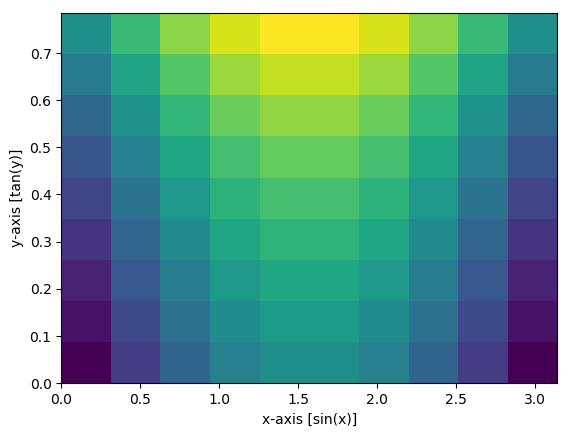

In [3]:
using PyPlot
imshow(transpose(prob);
       extent = (knots[1][1], knots[1][end], knots[2][1], knots[2][end]),
       aspect = "auto",
       origin = "lower")
ax = gca()
ax.set_xlabel("x-axis [sin(x)]")
ax.set_ylabel("y-axis [tan(y)]")
;

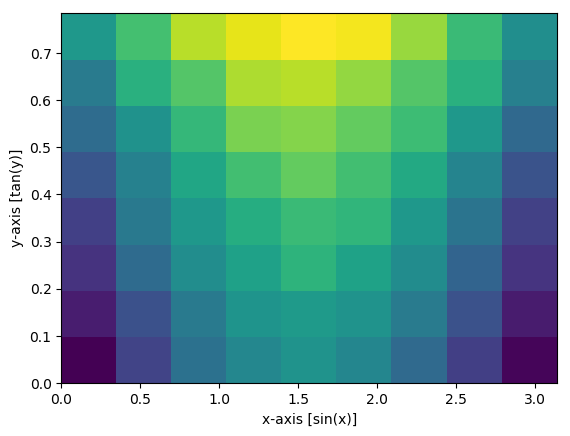

In [4]:
using InterpolatedRejectionSampling
n = 100_000
xy = irsample(knots,prob,n)
hist2D(xy[1,:],xy[2,:],
       bins=[X,Y])
ax = gca()
ax.set_xlabel("x-axis [sin(x)]")
ax.set_ylabel("y-axis [tan(y)]")
;

## throw away every other x or y

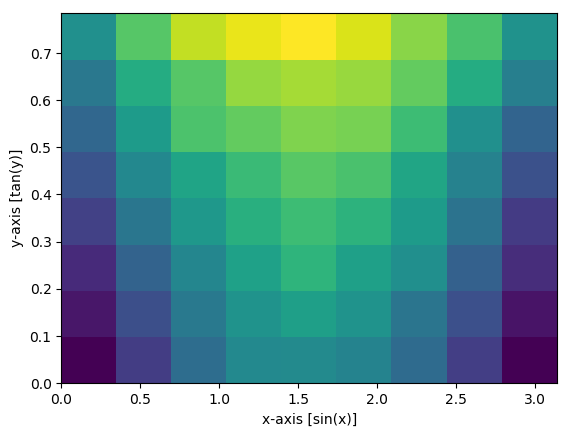

In [5]:
xy = convert(Matrix{Union{Missing,Float64}}, xy)
for i = 1:n
    if iseven(i)
        xy[1,i] = missing
    else
        xy[2,i] = missing
    end
end
irsample!(xy,knots,prob)
hist2D(xy[1,:],xy[2,:],
       bins=[X,Y])
ax = gca()
ax.set_xlabel("x-axis [sin(x)]")
ax.set_ylabel("y-axis [tan(y)]")
;

## Benchmarking

In [6]:
using BenchmarkTools
for i = 1:n
    if iseven(i)
        xy[1,i] = missing
    else
        xy[2,i] = missing
    end
end
@benchmark irsample!(xy,knots,prob)

BenchmarkTools.Trial: 
  memory estimate:  12.33 MiB
  allocs estimate:  200013
  --------------
  minimum time:     5.003 ms (0.00% GC)
  median time:      8.635 ms (26.59% GC)
  mean time:        8.392 ms (21.52% GC)
  maximum time:     78.848 ms (88.96% GC)
  --------------
  samples:          595
  evals/sample:     1

In [7]:
using BenchmarkTools
@benchmark irsample(knots,prob,n)

BenchmarkTools.Trial: 
  memory estimate:  43.60 MiB
  allocs estimate:  1470663
  --------------
  minimum time:     37.705 ms (13.28% GC)
  median time:      50.029 ms (13.58% GC)
  mean time:        51.103 ms (15.15% GC)
  maximum time:     144.499 ms (57.30% GC)
  --------------
  samples:          98
  evals/sample:     1

In [8]:
using BenchmarkTools
@benchmark irsample(X,sin.(X),n)

BenchmarkTools.Trial: 
  memory estimate:  7.71 MiB
  allocs estimate:  355344
  --------------
  minimum time:     10.348 ms (0.00% GC)
  median time:      13.885 ms (0.00% GC)
  mean time:        14.703 ms (8.48% GC)
  maximum time:     92.105 ms (83.98% GC)
  --------------
  samples:          340
  evals/sample:     1

# A more aggresive example

In [9]:
X = range(0, 5, length=10)
Y = range(0, 5, length=9)
knots = (X,Y)
prob = [exp10(x)*exp(y) for x in X, y in Y]
prob ./= maximum(prob)

10×9 Array{Float64,2}:
 6.73795e-8   1.25881e-7   2.35177e-7   …  5.35261e-6   1.0e-5     
 2.42149e-7   4.52394e-7   8.45184e-7      1.92363e-5   3.59381e-5 
 8.70239e-7   1.62582e-6   3.03743e-6      6.91317e-5   0.000129155
 3.12748e-6   5.8429e-6    1.0916e-5       0.000248446  0.000464159
 1.12396e-5   2.09983e-5   3.923e-5        0.00089287   0.0016681  
 4.03929e-5   7.54639e-5   0.000140985  …  0.00320881   0.00599484 
 0.000145165  0.000271203  0.000506674     0.0115319    0.0215443  
 0.000521695  0.000974654  0.00182089      0.0414433    0.0774264  
 0.00187487   0.00350273   0.00654395      0.14894      0.278256   
 0.00673795   0.0125881    0.0235177       0.535261     1.0        

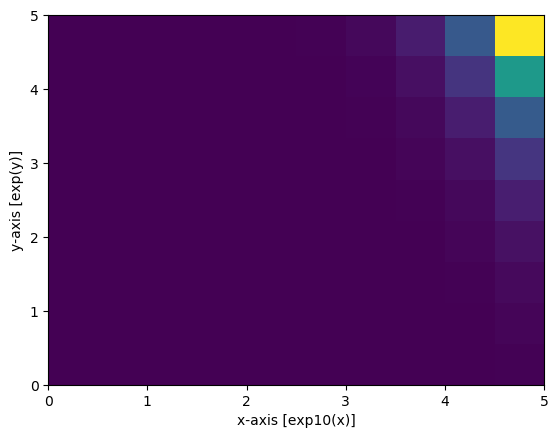

In [10]:
using PyPlot
imshow(transpose(prob);
       extent = (knots[1][1], knots[1][end], knots[2][1], knots[2][end]),
       aspect = "auto",
       origin = "lower")
ax = gca()
ax.set_xlabel("x-axis [exp10(x)]")
ax.set_ylabel("y-axis [exp(y)]")
;

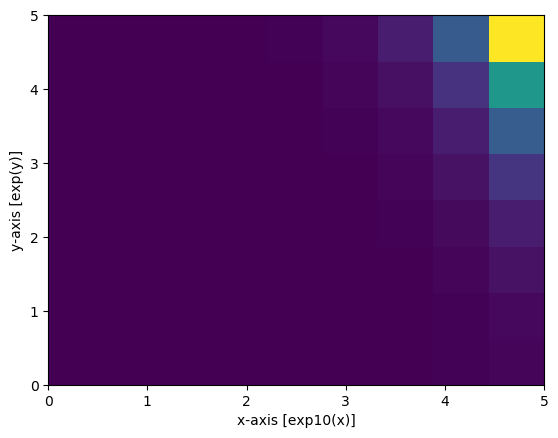

PyObject Text(24.000000000000007, 0.5, 'y-axis [exp(y)]')

In [11]:
xy = Matrix{Union{Missing,Float64}}(missing,2,100_000)
irsample!(xy,knots,prob)

hist2D(xy[1,:],xy[2,:], bins=[X,Y])

ax = gca()
ax.set_xlabel("x-axis [exp10(x)]")
ax.set_ylabel("y-axis [exp(y)]")

In [12]:
xy = Matrix{Union{Missing,Float64}}(missing,2,1000)
prob = [exp10(x)*exp(y) for x in X, y in Y]
prob ./= maximum(prob)
irsample!(xy,knots,prob)
@benchmark irsample!(xy,knots,prob)

BenchmarkTools.Trial: 
  memory estimate:  131.70 KiB
  allocs estimate:  2011
  --------------
  minimum time:     52.181 μs (0.00% GC)
  median time:      64.942 μs (0.00% GC)
  mean time:        115.768 μs (28.73% GC)
  maximum time:     88.642 ms (99.88% GC)
  --------------
  samples:          10000
  evals/sample:     1